<a href="https://colab.research.google.com/github/kieran514/Projects/blob/master/RASH_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 6.3MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 1.0MB 17.8MB/s 
     |████████████████████████████████| 358kB 44.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 40kB 5.7MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 2.6MB 42.0MB/s 


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

### Downloading the image data

In [ ]:
%cd drive/My\ Drive/Projects/RASH

/content/drive/My Drive/Projects/RASH


In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'c1918561255b42869fbba319742dd127')

In [ ]:
chicken_pox = 'chicken pox', 'chicken pox baby', 'chicken pox rash', 'chicken pox face', 'chicken pox body', 'chicken pox on black'
cold_sores = 'cold sores', 'cold sores mouth', 'cold sores lips', 'cold sores baby', 'cold sores on face'
eczema_dematitis = 'dermatitis', 'dermatitis rash'
measles = 'measles', 'measles baby', 'measles on face', 'measles rash', 'measles face', 'measles on black'
impetigo = 'impetigo', 'impetigo baby', 'impetigo on face', 'impetigo on body', 'impetigo rash', 'impetigo on black'
hives = 'hives on body', 'hives', 'hives baby', 'hives rash', 'hives on face', 'hives on black'
acne = 'baby acne', 'baby acne face', 'baby acne on body', 'acne', 'acne on face', 'acne on body', 'acne rash', 'acne on black'
heat_rash = 'heat rash', 'heat rash on face', 'heat rash on body', 'heat rash on black', 'heat rash baby'
scarlet_fever = 'scarlet fever', 'scarlet fever baby', 'scarlet fever on face', 'scarlet fever body', 'scarlet fever rash'

In [ ]:
path = Path('sample_baseline')

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in scarlet_fever:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o}')
#         download_images(dest, urls=results.attrgot('content_url'), max_pics=200)

### Preprocessing

In [ ]:
fns = get_image_files(path)
fns

(#2856) [Path('sample_baseline/Acne/Y000001116.jpg'),Path('sample_baseline/Acne/Y000000916.jpg'),Path('sample_baseline/Acne/Y000000822.jpg'),Path('sample_baseline/Acne/Y000000773.jpg'),Path('sample_baseline/Acne/Y000000973.jpg'),Path('sample_baseline/Acne/Y000000962.jpeg'),Path('sample_baseline/Acne/Y000001011.jpg'),Path('sample_baseline/Acne/Y000001086.jpg'),Path('sample_baseline/Acne/Y000001367.JPG'),Path('sample_baseline/Acne/Y000001306.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

In [ ]:
failed.map(Path.unlink);

In [ ]:
disease = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(256, min_scale=0.5),
    batch_tfms=aug_transforms()
    )
dls = disease.dataloaders(path, bs=64)

### How does the fastai augemntation work?

### Viewing and augmentation

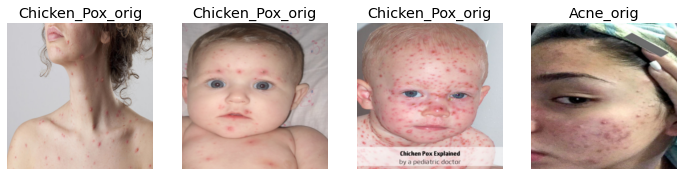

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

### Training

In [ ]:
learn = cnn_learner(dls, resnet101, metrics=[error_rate, accuracy], seed=42)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.043635,0.585418,0.333333,0.666667,00:04


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.108887,0.851570,0.555556,0.444444,00:05
1,0.876366,0.566408,0.166667,0.833333,00:05
2,0.827495,0.478008,0.111111,0.888889,00:05


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


### Evaluation

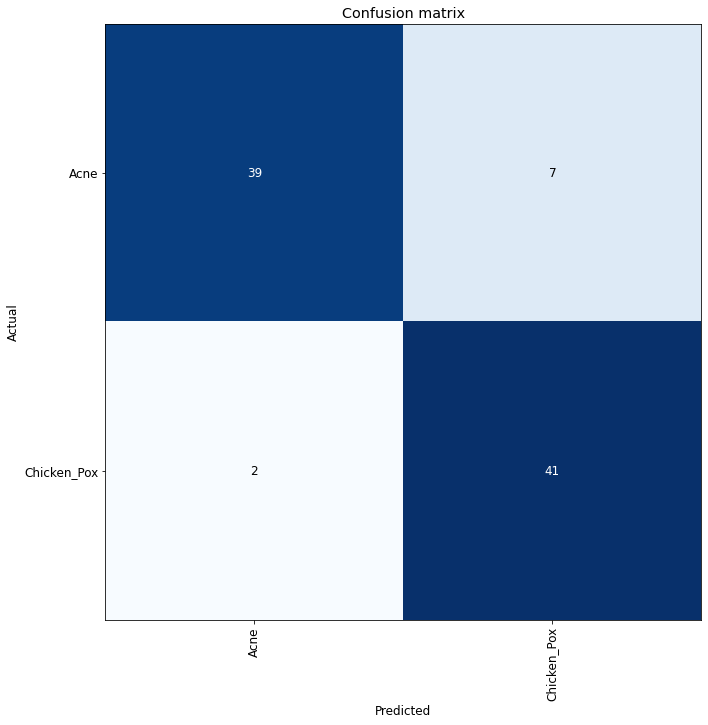

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

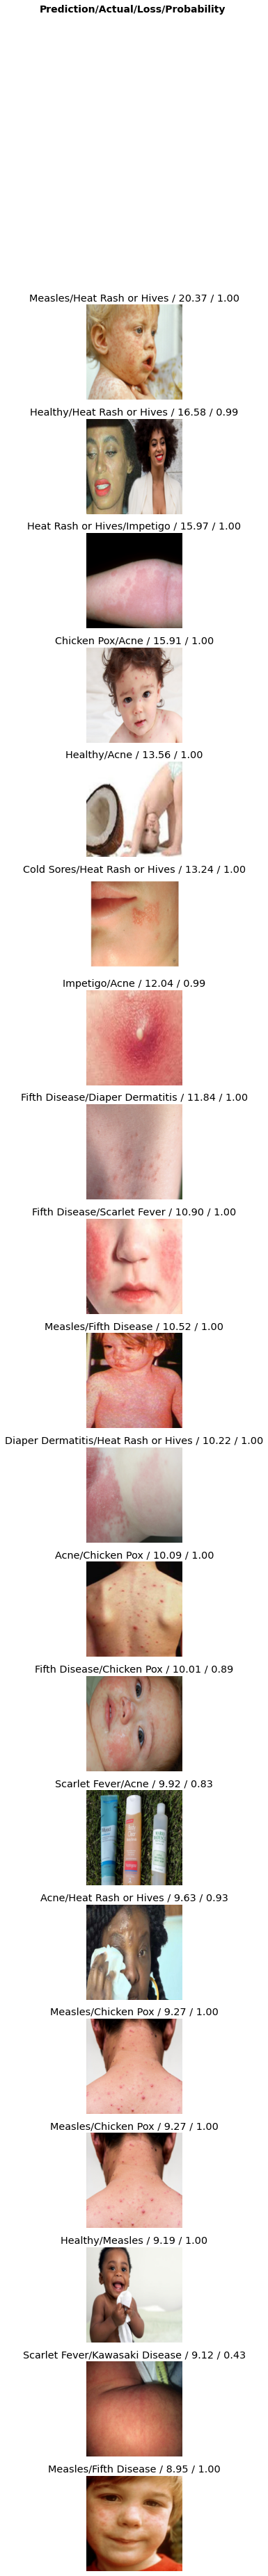

In [ ]:
interp.plot_top_losses(20, nrows=20)

### Cleaning data

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Exporting data

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

### Importing learner

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
cats = learn_inf.dls.vocab

In [ ]:
[i for i in cats]

['Acne',
 'Chicken Pox',
 'Cold Sores',
 'Diaper Dermatitis',
 'Eczema',
 'Fifth Disease',
 'Healthy',
 'Heat Rash or Hives',
 'Impetigo',
 'Kawasaki Disease',
 'Measles',
 'Scarlet Fever']

### Predicting

In [ ]:
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()

lbl_pred = widgets.Label()

btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    pred, pred_idx, probs = learn_inf.predict(img)
    top_idx = np.argpartition(probs, -2)[-2:]
    names = cats[top_idx]
    pb = probs[top_idx]
    os.system('cls')
    for i in range(2):
      lbl_pred.value = f'Prediction: {names[i]}; Probability: {pb[i] * 100:.04f}%'
      print(lbl_pred.value)

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])